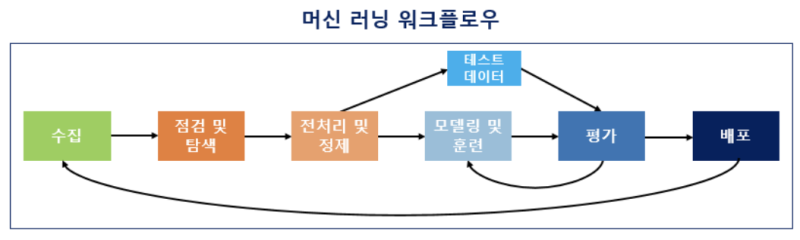

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---
## 1. 데이터셋을 가져오기 (수집)

In [2]:
import os
HOME = os.getcwd()
train_csv = os.path.join(HOME, "data/titanic/train.csv")

# train.csv를 읽어오기
train_df = pd.read_csv(train_csv)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---
## 2. 탐색적 데이터 분석 (EDA)

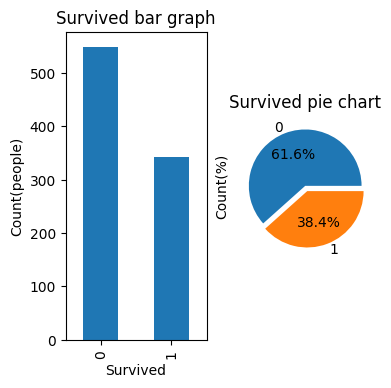

In [5]:
# 생존 여부의 시각화 (생각해볼 포인트: 어떤 그래프를 그리는 것이 좋을까)
# 1. bar or barh graph [0]

# 1행 2열로 그래프를 그리려면...가로 길이 12, 세로 길이 6
f, ax = plt.subplots(1, 2, figsize=(12, 6))

train_df.Survived.value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('Survived bar graph')
ax[0].set_ylabel('Count(people)')

# 2.pie chart [1]
train_df.Survived.value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', figsize=(4, 4), ax=ax[1])
ax[1].set_title('Survived pie chart')
ax[1].set_ylabel('Count(%)')

plt.show()

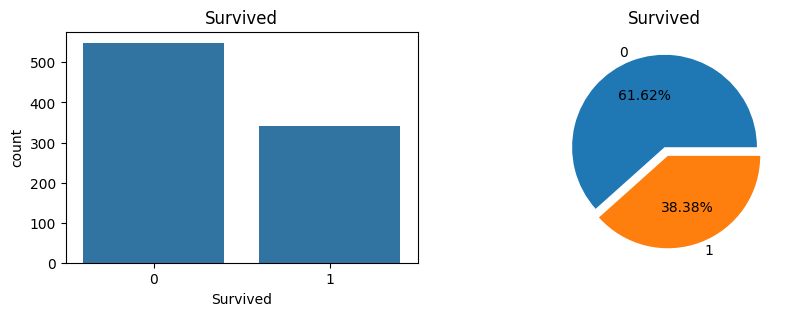

In [6]:
# 생존 여부 분포 시각화
f,ax=plt.subplots(1,2,figsize=(10, 3))

# seaborn 최신 버전에서는 x 파라미터를 명시적으로 지정해야 함
sns.countplot(x='Survived', data=train_df, ax=ax[0])
ax[0].set_title('Survived')

train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],
                                             autopct='%1.2f%%',ax=ax[1])
ax[1].set_title('Survived')
ax[1].set_ylabel('')

plt.show()

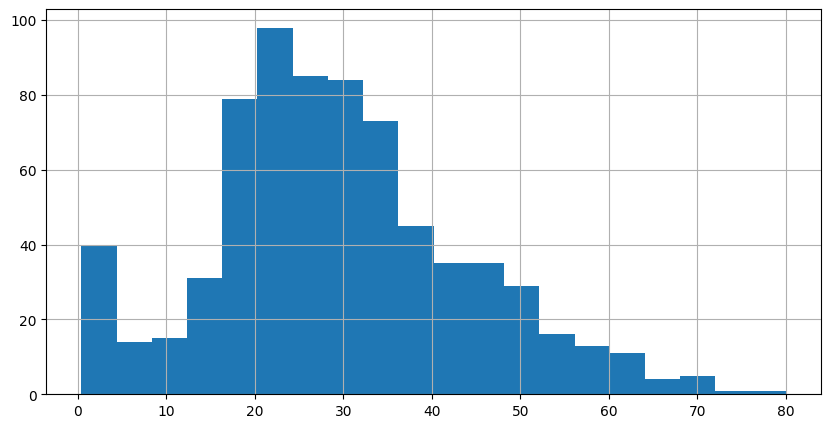

In [7]:
# 나이 분포 (Histogram)
# 나이 전체를 몇개로 나눌지 결정 -> bins
train_df.Age.hist(bins=20, figsize=(10, 5))
plt.show()

In [8]:
# 선실 등급별 평균 생존율, 평균 나이, 요금, 가족(sibsp, parch)수
train_df.groupby('Pclass').agg({'Survived': 'mean', 'Age': 'mean', 'Fare': 'mean', 'SibSp': 'mean', 'Parch': 'mean'})

,Survived,Age,Fare,SibSp,Parch
Pclass,,,,,
1,0.629630,38.233441,84.154687,0.416667,0.356481
2,0.472826,29.877630,20.662183,0.402174,0.380435
3,0.242363,25.140620,13.675550,0.615071,0.393075


In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
train_df.drop(['PassengerId', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [11]:
# train_df['Embarked']의 결측치를 most_frequent로 대체
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

C:\Users\0726b\AppData\Local\Temp\ipykernel_25676\3312028165.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)


In [12]:
# Sex랑 Embarked를 label encoder를 사용하여 수치로 변환
from sklearn.preprocessing import LabelEncoder

# 1. 레이블 인코드 생성
label_encoder = LabelEncoder()

# 2. 'Sex'와 'Embarked'를 레이블 인코드로 변환
train_df['Sex'] = label_encoder.fit_transform(train_df['Sex'])
train_df['Embarked'] = label_encoder.fit_transform(train_df['Embarked'])

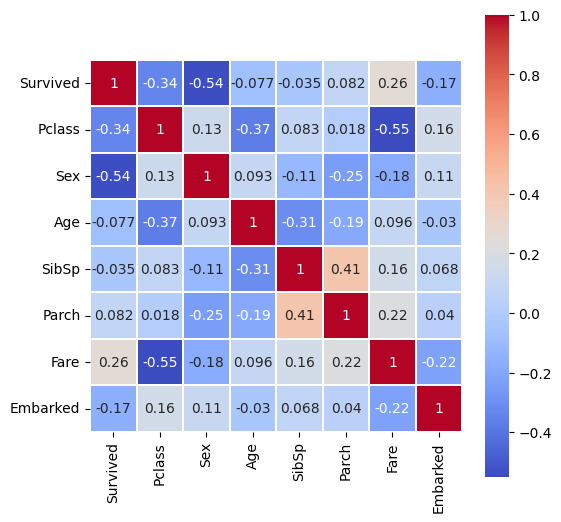

In [13]:
# 상관 관계(벡터의 상관관계) 
# pandas에서 corr()를 seaborn의 heatmap으로 시각화
plt.figure(figsize=(6, 6))
sns.heatmap(train_df.drop('Name', axis=1).corr(), annot=True, cmap='coolwarm',square=True, linecolor="white", linewidths=0.01)
plt.show()

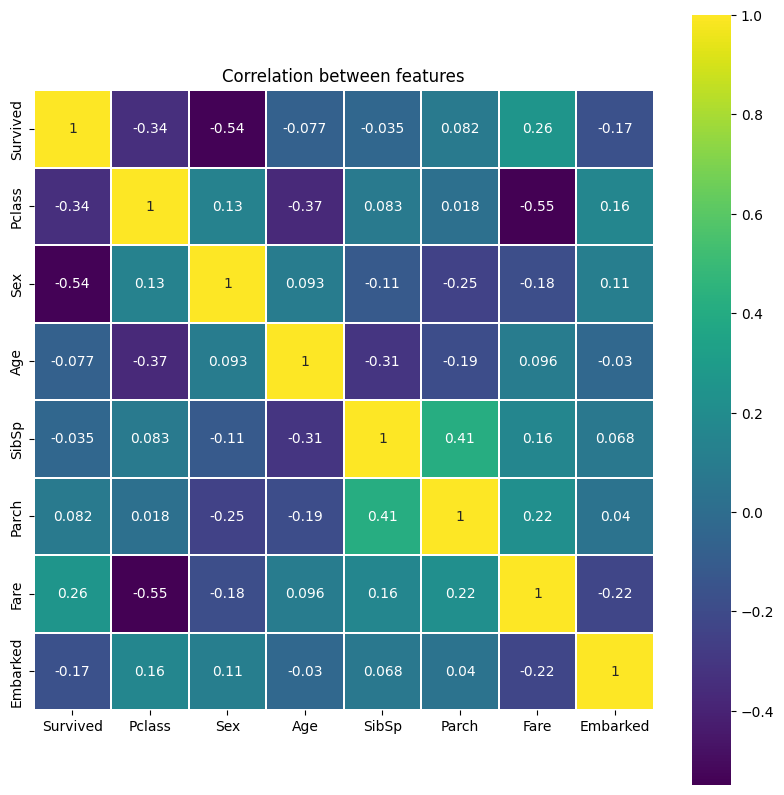

In [14]:
# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 10))
sns.heatmap(train_df.corr(numeric_only=True), linewidths=0.01, square=True,
            annot=True, cmap=plt.cm.viridis, linecolor="white")
plt.title('Correlation between features')
plt.show()

In [15]:
# Age에 대한 결측치 채우기
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())

In [16]:
# Kaggle은 노트북을 보면 나이를 숫자로 그대로 사용하지 않고, 구간을 정해서 사용
# 0~3세, 4~7세, 8~15세, 16~30세, 31~60세, 61~81세
train_df['Age_cat'] = pd.cut(train_df['Age'], bins=[0, 3, 7, 15 ,30, 60, 81], labels = ['baby', 'children', 'teenage', 'young', 'adult', 'elder'])
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_cat
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,young
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,adult
2,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,young
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,adult
4,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,adult


In [17]:
# 'Age_cat'를 기준으로 groupby
train_df.groupby(['Age_cat'], observed = True)['Survived'].mean()

Age_cat
baby        0.666667
children    0.700000
teenage     0.454545
young       0.335984
adult       0.420495
elder       0.227273
Name: Survived, dtype: float64

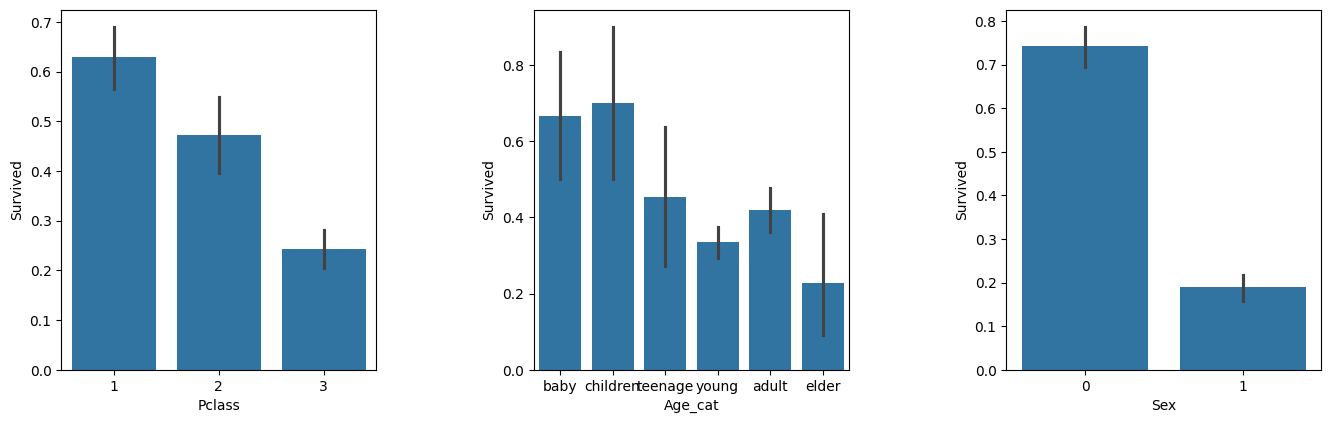

In [18]:
# 등급, 나이대, 성별에 따른 생존률 시각화
plt.figure(figsize=[14,4])
plt.subplot(131)
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.subplot(132)
sns.barplot(x='Age_cat', y='Survived', data=train_df)
plt.subplot(133)
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.subplots_adjust(top=1, bottom=0.1, left=0.10, right=1, hspace=0.5, wspace=0.5)
plt.show()

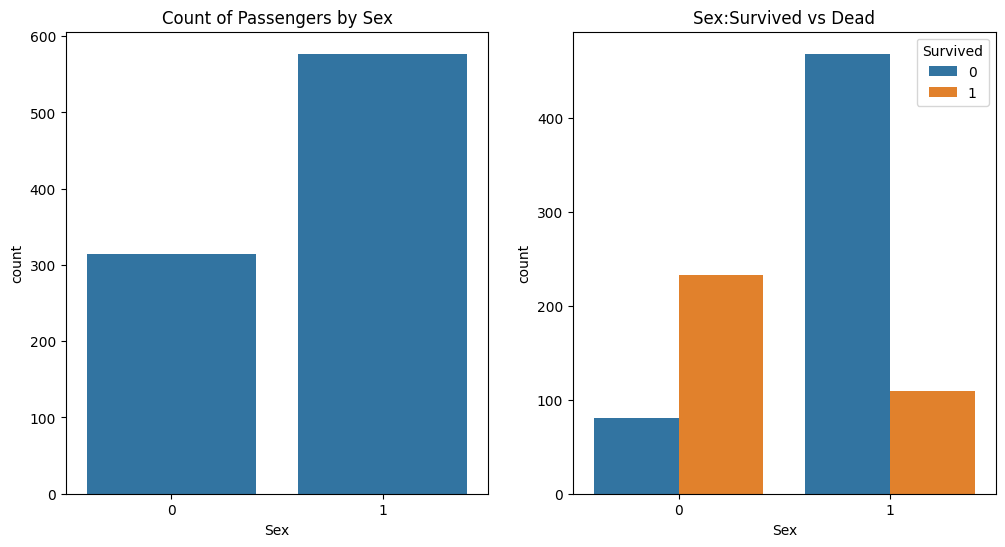

In [19]:
# 성별에 따른 생존 여부 시각화
f,ax=plt.subplots(1,2,figsize=(12,6))
sns.countplot(x='Sex', data=train_df, ax=ax[0])
ax[0].set_title('Count of Passengers by Sex')

sns.countplot(x='Sex', hue='Survived', data=train_df, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

#### 귀족들의 생존율만 다시 조사해보기

In [20]:
train_df.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Age_cat
0,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,7.2500,2,young
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,71.2833,0,adult
2,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,7.9250,2,young
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,53.1000,2,adult
4,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,8.0500,2,adult
5,0,3,"Moran, Mr. James",1,29.699118,0,0,8.4583,1,young
6,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,51.8625,2,adult
7,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,21.0750,2,baby
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,11.1333,2,young
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,30.0708,0,teenage


In [21]:
# 0행의 이름을 가져와서 콤마로 분리, 점으로 분리, 공백 제거
train_df.Name[0].split(',')[1].split('.')[0].strip()

'Mr'

In [22]:
# 위의 이름을 분리하는 (신분만 취하는) 코드를 사용하여 람다 함수 생성
# 그 사람의 신분을 나타내는 것을 title
conversion_rare = title = lambda x: x.split(',')[1].split('.')[0].strip()
train_df['Title'] = train_df['Name'].map(conversion_rare)
# 신분에서 중복되는 것을 하나로 합치고, unique한 목록만 출력
titles = train_df['Title'].unique()
print(titles)



['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']


In [23]:
# ['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
# 'Sir' 'Mlle' 'Col' 'Capt' 'the Countess' 'Jonkheer']
# 위의 호칭중에 중복된 것들을 제거한다.

train_df['Title'] = train_df['Title'].replace('Mlle', 'Miss')
train_df['Title'] = train_df['Title'].replace('Ms', 'Miss')
train_df['Title'] = train_df['Title'].replace('Mme', 'Mrs')

Rare = ['Lady','the Countess','Countess','Capt', 'Master',
        'Col','Don','Dr','Major','Rev','Sir','Jonkheer', 'Dona']

for each in Rare:
    train_df['Title'] = train_df['Title'].replace(each, 'Rare')
    
train_df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Rare'], dtype=object)

---
## 3. 전처리 (Preprocessing)

In [24]:
train_df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Age_cat     0
Title       0
dtype: int64

In [25]:
# train_df에서 get_dummies() 함수를 사용하여 원-핫 인코딩을 적용

In [32]:
# ['Pclass', 'Sex', 'Embarked', 'Title', 'Age_cat']를 원-핫 인코딩으로 변환
train_df2 = pd.get_dummies(train_df, columns=['Pclass', 'Sex', 'Embarked', 'Title', 'Age_cat'])
train_df2.head()


,Survived,Name,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_0,...,Title_Miss,Title_Mr,Title_Mrs,Title_Rare,Age_cat_baby,Age_cat_children,Age_cat_teenage,Age_cat_young,Age_cat_adult,Age_cat_elder
0,0,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,False,False,True,False,...,False,True,False,False,False,False,False,True,False,False
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,True,False,False,True,...,False,False,True,False,False,False,False,False,True,False
2,1,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,False,False,True,True,...,True,False,False,False,False,False,False,True,False,False
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,True,False,False,True,...,False,False,True,False,False,False,False,False,True,False
4,0,"Allen, Mr. William Henry",35.0,0,0,8.0500,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False


In [41]:
# 데이터 분할(train/test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df2.drop('Survived', axis=1), train_df2['Survived'], test_size=0.2, stratify=train_df2['Survived'], random_state=42)

In [42]:
X_train.shape, X_test.shape

((712, 22), (179, 22))

In [43]:
y_train.value_counts(), y_test.value_counts()

(Survived
 0    439
 1    273
 Name: count, dtype: int64,
 Survived
 0    110
 1     69
 Name: count, dtype: int64)

---
## 4. 모델링 (학습)

In [33]:
print(train_df2.columns.tolist())

['Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_0', 'Sex_1', 'Embarked_0', 'Embarked_1', 'Embarked_2', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare', 'Age_cat_baby', 'Age_cat_children', 'Age_cat_teenage', 'Age_cat_young', 'Age_cat_adult', 'Age_cat_elder']


In [ ]:
train_df2 = train_df2.drop(columns=['Name'])
train_df2.columns.tolist()

['Survived',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Pclass_1',
 'Pclass_2',
 'Pclass_3',
 'Sex_0',
 'Sex_1',
 'Embarked_0',
 'Embarked_1',
 'Embarked_2',
 'Title_Miss',
 'Title_Mr',
 'Title_Mrs',
 'Title_Rare',
 'Age_cat_baby',
 'Age_cat_children',
 'Age_cat_teenage',
 'Age_cat_young',
 'Age_cat_adult',
 'Age_cat_elder']

In [38]:
# survived와 상관계수의 값이 +-0.2이상인 컬럼만 추출
colList = train_df2.corr(numeric_only=True)["Survived"].abs().sort_values(ascending=False)
print(colList)

Survived            1.000000
Title_Mr            0.549199
Sex_1               0.543351
Sex_0               0.543351
Title_Mrs           0.341994
Title_Miss          0.335636
Pclass_3            0.322308
Pclass_1            0.285904
Fare                0.257307
Embarked_0          0.168240
Embarked_2          0.149683
Age_cat_young       0.112039
Age_cat_baby        0.108558
Age_cat_children    0.098513
Pclass_2            0.093349
Parch               0.081629
Age                 0.069809
Title_Rare          0.061385
Age_cat_adult       0.051424
Age_cat_elder       0.051224
SibSp               0.035322
Age_cat_teenage     0.028514
Embarked_1          0.003650
Name: Survived, dtype: float64


#### 생존자 예측을 위해 **Decision Tree** 모델링을 사용

In [58]:
# DecisionTreeClassifier를 사용
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. 모델 생성
model = DecisionTreeClassifier()

# 2. 모델 학습
model.fit(X_train, y_train)

# 3. 예측
y_pred = model.predict(X_test)

# 4. 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8044692737430168


---
## 5. 평가 (Evaluation)

---
## 6. 배포 (Deployment)
* gradio나 streamlit을 사용하여 배포를 한다.
* 모델을 테스트하기 위해 환경 제공